# **정규표현식**
- 문자열 처리할 때 나만의 패턴, 분석가의 다양한 사례에서 요구하는 조건의 패턴을 만들어 처리하는 방법
- 이메일주소찾기, 아이디&비번 패턴찾기, 회원가입 아이디 패턴 등

---



In [1]:
import re

내가 원하는 패턴 (Hello) -> 해당 index 출력

In [2]:
re.match('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [3]:
re.search('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

match: 바로 앞 index만 확인

In [4]:
re.match('Hello', 'world! Hello ')

- 숫자 [0-9]
- 영어소문자 [a-z], 대문자 [A-Z]
- 한글 [가-힣]
- 자음 [ㄱ-ㅎ], 모음 [ㅏ-ㅣ]
- ^ not 표현 (~제외하고 전부)
- '+' 0개 이상, '*' 1개 이상의 패던

In [6]:
re.search('[0-9]','1231243134123,asdfasdf!@3121')

<re.Match object; span=(0, 1), match='1'>

In [7]:
re.search('[0-9]+','1231243134123,asdfasdf!@3121')

<re.Match object; span=(0, 13), match='1231243134123'>

- {숫자} 해당 패턴을 '숫자'개 찾기
- ex) {3} -> 3개 패턴 찾기

In [8]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}','010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

- \d 모든 숫자
- \D 모든 숫자 제외
- \w 영문, 숫자, '_' 포함
- \W 영문, 숫자, '_' 제외한 나머지

In [9]:
re.search('\d+','1231243134123,asdfasdf!@3121')

<re.Match object; span=(0, 13), match='1231243134123'>

그룹으로 사용 가능

In [10]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abc')

In [11]:
ab.group(1)

'1234'

In [12]:
ab.group(2)

'abc'

In [13]:
ab.group(0)

'1234 abc'

## 정규표현식 및 텍스트 분석

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('movie_rv.csv')
df

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


## strip()

In [16]:
# 공백 제거
df['document'].str.strip()

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [17]:
# 원하는 문자 추가
df['document'].str.center(width=30, fillchar='/')

0                            /////아 더빙.. 진짜 짜증나네요 목소리//////
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            //////너무재밓었다그래서보는것을추천한다///////
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정/
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       /////인간이 문제지.. 소는 뭔죄인가..//////
149996                       ////////평점이 너무 낮아서.../////////
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       /청춘 영화의 최고봉.방황과 우울했던 날들의 자화상//
149999                       ///한국 영화 최초로 수간하는 내용이 담긴 영화///
Name: document, Length: 150000, dtype: object

In [18]:
df['document'].str.ljust(width=30, fillchar='/')

0                            아 더빙.. 진짜 짜증나네요 목소리///////////
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            너무재밓었다그래서보는것을추천한다/////////////
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정/
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       인간이 문제지.. 소는 뭔죄인가..///////////
149996                       평점이 너무 낮아서.../////////////////
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       청춘 영화의 최고봉.방황과 우울했던 날들의 자화상///
149999                       한국 영화 최초로 수간하는 내용이 담긴 영화//////
Name: document, Length: 150000, dtype: object

## split()

In [19]:
# split() -> expand=True 여러 컬럼으로 나누기, False 1개 컬럼에 나누기
df[['document_1','document_2']] = df['document'].str.split(' ', n=1, expand=True) # n 구분자 1개

In [20]:
# partition(): 좌측에 먼저 출현한 구분자 나누기
df[['document_1n','document_2n','document_3n']] = df['document'].str.partition(sep=' ')

In [21]:
df

,Unnamed: 0,id,document,label,document_1,document_2,document_1n,document_2n,document_3n
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아,더빙.. 진짜 짜증나네요 목소리,아,,더빙.. 진짜 짜증나네요 목소리
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠...포스터보고,초딩영화줄....오버연기조차 가볍지 않구나,흠...포스터보고,,초딩영화줄....오버연기조차 가볍지 않구나
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,None,너무재밓었다그래서보는것을추천한다,,
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소,이야기구먼 ..솔직히 재미는 없다..평점 조정,교도소,,이야기구먼 ..솔직히 재미는 없다..평점 조정
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...,사이몬페그의,,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...
...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,인간이,문제지.. 소는 뭔죄인가..,인간이,,문제지.. 소는 뭔죄인가..
149996,149996,8549745,평점이 너무 낮아서...,1,평점이,너무 낮아서...,평점이,,너무 낮아서...
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,이게,,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘,영화의 최고봉.방황과 우울했던 날들의 자화상,청춘,,영화의 최고봉.방황과 우울했던 날들의 자화상


## 영어 대소문자 바꾸기
- lower 소문자 변경
- upper 대문자 변경
- capitalize 앞문자 대문자로 변경
- title 단위별 앞문자 대문자로 변경
- swapcase 소문자->대문자, 대문자->소문자

## replace()

In [22]:
df['document'].str.replace(pat='.', repl='*', regex=False)

0                                       아 더빙** 진짜 짜증나네요 목소리
1                         흠***포스터보고 초딩영화줄****오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 **솔직히 재미는 없다**평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지** 소는 뭔죄인가**
149996                                        평점이 너무 낮아서***
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉*방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

## find()

In [23]:
df['document_non'] = df['document'].str.find(sub='.')

In [24]:
df['findall_docu'] = df['document'].str.findall(pat='[재미]')

In [25]:
df['findall_num'] = df['document'].str.findall(pat='[0-9]+')

## slice(), slice_replace()

In [26]:
df['document'].str.slice_replace(start=0, stop=4, repl='!')

0                                          !.. 진짜 짜증나네요 목소리
1                            !포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                            !었다그래서보는것을추천한다
3                                !이야기구먼 ..솔직히 재미는 없다..평점 조정
4         !그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트...
                                ...                        
149995                                     !문제지.. 소는 뭔죄인가..
149996                                           !너무 낮아서...
149997                         !요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                             !화의 최고봉.방황과 우울했던 날들의 자화상
149999                                !화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [27]:
df['document_0_5'] = df['document'].str.slice(start=0, stop=5)

In [28]:
df

,Unnamed: 0,id,document,label,document_1,document_2,document_1n,document_2n,document_3n,document_non,findall_docu,findall_num,document_0_5
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아,더빙.. 진짜 짜증나네요 목소리,아,,더빙.. 진짜 짜증나네요 목소리,4.0,[],[],아 더빙.
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠...포스터보고,초딩영화줄....오버연기조차 가볍지 않구나,흠...포스터보고,,초딩영화줄....오버연기조차 가볍지 않구나,1.0,[],[],흠...포
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,None,너무재밓었다그래서보는것을추천한다,,,-1.0,[재],[],너무재밓었
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소,이야기구먼 ..솔직히 재미는 없다..평점 조정,교도소,,이야기구먼 ..솔직히 재미는 없다..평점 조정,10.0,"[재, 미]",[],교도소 이
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...,사이몬페그의,,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...,-1.0,[],[],사이몬페그
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,인간이,문제지.. 소는 뭔죄인가..,인간이,,문제지.. 소는 뭔죄인가..,7.0,[],[],인간이 문
149996,149996,8549745,평점이 너무 낮아서...,1,평점이,너무 낮아서...,평점이,,너무 낮아서...,10.0,[],[],평점이 너
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,이게,,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,-1.0,[],[],이게 뭐요
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘,영화의 최고봉.방황과 우울했던 날들의 자화상,청춘,,영화의 최고봉.방황과 우울했던 날들의 자화상,10.0,[],[],청춘 영화


## len()

In [29]:
df['document_len'] = df['document'].str.len()

In [30]:
import matplotlib.pyplot as plt

(array([36766., 46098., 33551., 12015.,  6098.,  3990.,  3136.,  2231.,
         2361.,  3749.]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

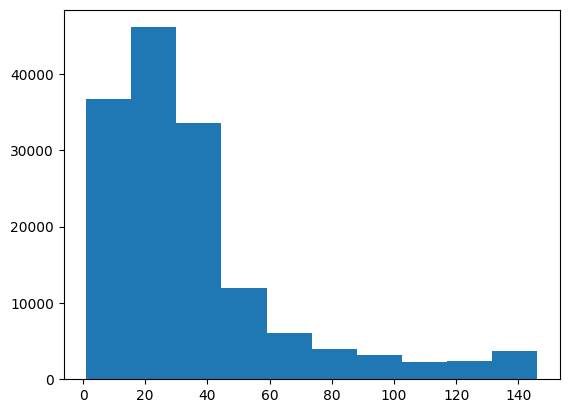

In [31]:
plt.hist(df['document_len'])

In [32]:
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64